# Find worst cases 

\begin{equation}
\begin{array}{rl}
    \mathcal{F}_L =& \dfrac{4 K I H r}{Q_{in}(1+f)}\\
    u_{c} =& \dfrac{-KI\mathcal{F}_L}{\theta \left(\mathcal{F}_L+1\right)}\\
    \tau =& -\dfrac{r}{|u_{c}|}\\
    C_{\tau,{\rm decay}}=& C_0 \exp{\left(-\lambda \tau \right)}\\
    C_{\tau,{\rm filtr}}=& C_0 \exp{\left(-k_{\rm att} \tau \right)}\\
    C_{\tau,{\rm dilut}} =& C_{in} \left( \dfrac{Q_{in}}{u_c \Delta y \Delta z} \right)\\
    C_{\tau,{\rm both}} =& \dfrac{C_{\rm in}Q_{\rm in}}{u_c \Delta y H \theta} \exp{\left(-\lambda\dfrac{r}{|u_c|}\right)}
\end{array}
\end{equation}

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from os import system
import os
from matplotlib.gridspec import GridSpec 
from drawStuff import *

import jupypft.attachmentRateCFT as CFT
import jupypft.plotBTC as BTC

''' GLOBAL CONSTANTS '''
PI = 3.141592
THETA = 0.35

In [2]:
def flowNumber():
    return (4.0*K*I*H*r) / (Qin*(1+f))

def uChar():
    '''Interstitial water velocity'''
    return -(K*I*flowNumber())/(THETA*(flowNumber() + 1))

def tChar():
    return -r/uChar()

def cDecay():
    return C0 * np.exp(-decayRate * tChar())

def cAttach():
    return C0 * np.exp(-attchRate * tChar())

def cDilut():
    return (C0 * Qin) / (-uChar() * delY * delZ * THETA)

def cBoth():
    return (C0 * Qin) / (-uChar() * delY * delZ * THETA) * np.exp(-decayRate * tChar())

def cTrice():
    return (C0 * Qin) / (-uChar() * delY * delZ * THETA) * np.exp(-(decayRate+attchRate) * tChar())

def findSweet():
    deltaConc = np.abs(cBoth() - np.max(cBoth()))
    return np.argmin(deltaConc)

In [3]:
K = 10**-2
Qin = 0.24/86400
f = 10
H = 20
r = 40
I = 0.001
C0 = 1.0
qabs = np.abs(uChar()*THETA)

kattDict = dict(
    dp = 1.0E-7,
    dc = 2.0E-3,
    q = qabs,
    theta = THETA,
    visco = 0.0008891,
    rho_f = 999.79,
    rho_p = 1050.0,
    A = 5.0E-21,
    T = 10. + 273.15,
    alpha = 0.01)

decayRate = 3.5353E-06
attchRate,_ = CFT.attachmentRate(**kattDict)
delY,delZ = 1.35,H

In [4]:
print("Nondim Flow  = {:.2E}".format(flowNumber()))
print("Charac. Vel  = {:.2E} m/s".format(uChar()))
print("Charac. time = {:.2E} s".format(tChar()))

Nondim Flow  = 1.05E+03
Charac. Vel  = -2.85E-05 m/s
Charac. time = 1.40E+06 s


In [5]:
print("Rel concenc. due decay = {:.2E}".format(cDecay()))
print("Rel conc. due dilution = {:.2E}".format(cDilut()))
print("Rel conc. due attachmt = {:.2E}".format(cAttach()))
print("Rel conc. due both eff = {:.2E}".format(cBoth()))
print("Rel conc. due three ef = {:.2E}".format(cTrice()))

Rel concenc. due decay = 7.05E-03
Rel conc. due dilution = 1.03E-02
Rel conc. due attachmt = 4.42E-05
Rel conc. due both eff = 7.26E-05
Rel conc. due three ef = 3.21E-09


# Plot v. 1

# v.2 With PFLOTRAN result

In [6]:
listOfFiles = os.listdir("LittleValidation_MASSBALANCES")
listOfFiles.sort()
    
IPFLO = [float(s[9:16]) for s in listOfFiles]
CPFLO = BTC.get_endConcentrations(
            "LittleValidation_MASSBALANCES",
            indices={'t':"Time [d]",\
                     'q':"ExtractWell Water Mass [kg/d]",\
                     'm':"ExtractWell Vaq [mol/d]"
                    },
            normalizeWith=dict(t=1.0,q=kattDict['rho_f']/1000.,m=1.0))

In [7]:
listOfFiles = os.listdir("LittleValidation_MASSBALANCES_Att")
listOfFiles.sort()
    
IPFLO2 = [float(s[8:15]) for s in listOfFiles]
CPFLO2 = BTC.get_endConcentrations(
            "LittleValidation_MASSBALANCES_Att",
            indices={'t':"Time [d]",\
                     'q':"ExtractWell Water Mass [kg/d]",\
                     'm':"ExtractWell Vaq [mol/d]"
                    },
            normalizeWith=dict(t=1.0,q=kattDict['rho_f']/1000.,m=1.0))

<ipython-input-13-6a34bac336e9>:48: RuntimeWarning: divide by zero encountered in log10
  ax.plot(I,-np.log10(cAtt),\
<ipython-input-13-6a34bac336e9>:54: RuntimeWarning: divide by zero encountered in log10
  ax.plot(I,-np.log10(cAll),\
<ipython-input-13-6a34bac336e9>:80: RuntimeWarning: divide by zero encountered in log10
  ax.plot(I,-np.log10(cAll),\


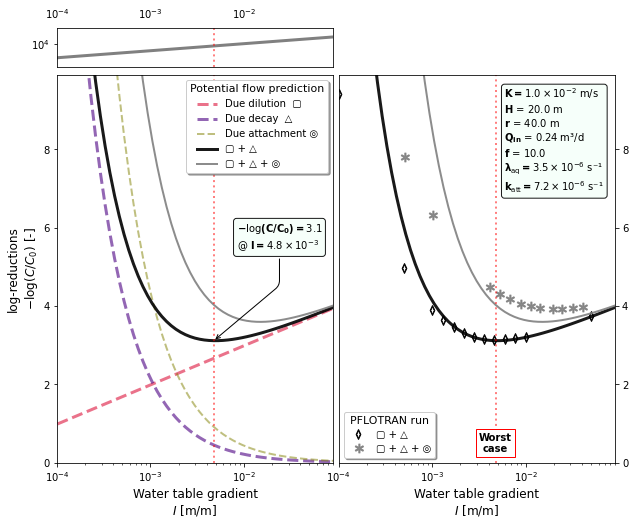

In [13]:
# Theoretical stuff
I = 10**np.linspace(-5,0,num=100)
cDec = cDecay()
cDil = cDilut()
cAtt = cAttach()
cBot = cBoth()
cAll = cTrice()
i = findSweet()
worstC = cBot[i]
worstI = I[i]

fig, axs = plt.subplots(2,2,sharex=True, sharey=False,\
              figsize=(10,8),gridspec_kw={"height_ratios":[1,10],"hspace":0.04,"wspace":0.02}) 

bbox = dict(boxstyle='round', facecolor='mintcream', alpha=0.90)

arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=90,angleB=40,rad=5")

fontdict = dict(size=12)

annotation = \
    r"$\bf{-\log(C/C_0)} = $" + "{:.1f}".format(-np.log10(worstC)) + \
    "\n@" + r" $\bf{I} = $" + BTC.sci_notation(worstI)

information = \
    r"$\bf{K} = $" + BTC.sci_notation(K) + " m/s\n"\
    r"$\bf{H}$" + " = {:.1f} m".format(H) + "\n"\
    r"$\bf{r}$" + " = {:.1f} m".format(r) + "\n"\
    r"$\bf{Q_{in}}$" + " = {:.2f} m³/d".format(Qin*86400) + "\n"\
    r"$\bf{f}$" + " = {:.1f}".format(f) + "\n"\
    r"$\bf{\lambda_{\rm aq}} = $" + BTC.sci_notation(decayRate) + " s⁻¹\n"\
    r"$\bf{k_{\rm att}} = $" + BTC.sci_notation(attchRate) + " s⁻¹"

####################################
# Ax2 - log-removals
ax = axs[1,0]

symbols=dict(dil="\u25A2",dec="\u25B3",att="\u25CE")

ax.plot(I,-np.log10(cDil),\
        label="Due dilution  " + symbols['dil'],\
        lw=3,ls="dashed",alpha=0.6,c='crimson')
ax.plot(I,-np.log10(cDec),\
        label="Due decay  " + symbols['dec'],\
        lw=3,ls="dashed",alpha=0.6,c='indigo')
ax.plot(I,-np.log10(cAtt),\
        label="Due attachment " + symbols['att'],\
        lw=2,ls="dashed",alpha=0.5,c='olive')
ax.plot(I,-np.log10(cBot),\
        label=symbols['dil'] + " + " + symbols['dec'],\
        lw=3,c='k',alpha=0.9,zorder=2)
ax.plot(I,-np.log10(cAll),\
        label=symbols['dil'] + " + " + symbols['dec'] + " + " + symbols['att'],\
        lw=2,c='gray',alpha=0.9,zorder=2)

ax.set(xscale="log")
ax.set(xlim=(1.0E-4,1.0E-1),ylim=(0,9.9))
ax.legend(loc="upper right",shadow=True,ncol=1,\
          title="Potential flow prediction",title_fontsize=11)

ax.annotate(annotation,(worstI,-np.log10(worstC)),
    xytext=(0.65,0.55), textcoords='axes fraction',
    bbox=bbox, arrowprops=arrowprops)

ax.set_xlabel("Water table gradient\n$I$ [m/m]",fontdict=fontdict)
ax.set_ylabel("log-reductions\n$-\log(C/C_0)$ [-]",fontdict=fontdict)

####################################
# Ax2 - log-removals
ax = axs[1,1]
ax.plot(I,-np.log10(cBot),
        lw=3,c='k',alpha=0.9)
ax.plot(IPFLO,-np.log10(CPFLO),zorder=2,\
        label= symbols['dil'] + " + " + symbols['dec'],\
        lw=0,ls='dotted',c='k',alpha=0.9,\
        marker="$\u25CA$",mec='k',mfc='k',ms=10)

ax.plot(I,-np.log10(cAll),\
        lw=2,c='gray',alpha=0.9)
ax.plot(IPFLO2,-np.log10(CPFLO2),zorder=2,\
        label= symbols['dil'] + " + " + symbols['dec'] + " + " + symbols['att'],\
        lw=0,ls='dotted',c='gray',alpha=0.9,\
        marker="$\u2217$",mec='gray',mfc='gray',ms=10)
#####

ax.set(xscale="log")
ax.set(xlim=(1.0E-4,9.0E-2),ylim=(0,9.9))
ax.legend(loc="lower left",shadow=True,ncol=1,\
          labelspacing=0.4,mode=None,\
          title="PFLOTRAN run",title_fontsize=11)
ax.set_xlabel("Water table gradient\n$I$ [m/m]",fontdict=fontdict)
ax.yaxis.tick_right()

ax.text(0.60,0.70,information,bbox=bbox,transform=ax.transAxes)
ax.text(I[i],0.5,"Worst\ncase",\
        ha='center',va='center',weight='semibold',\
        bbox=dict(boxstyle='square', fc='white', ec='red'))

####################################
#Flow number
ax = axs[0,0]
ax.plot(I,flowNumber(),label="flowNumber",lw=3,c="gray")
#ax.axhline(y=1.0)
ax.set_xscale("log")
ax.set_yscale("log")
ax.xaxis.set_tick_params(which="both",labeltop='on',top=False,bottom=False)
#ax.set_ylabel("Nondim. flow number\n$\mathcal{F}_L$ [-]")

####################################<
#Line worst case scenario
axs[0,0].axvline(x=I[i], lw=2, ls="dotted", c="red",alpha=0.5)
axs[1,0].axvline(x=I[i], lw=2, ls="dotted", c="red",alpha=0.5)
axs[1,1].axvline(x=I[i], lw=2, ls="dotted", c="red",alpha=0.5)

###############################
# Information box
ax = axs[0,1]
ax.axis('off')

plt.show()

____
# Find the worst case 
## >> Geometric parameters $H$ and $r$

## >>Well parameters

## Hydraulic conductivity

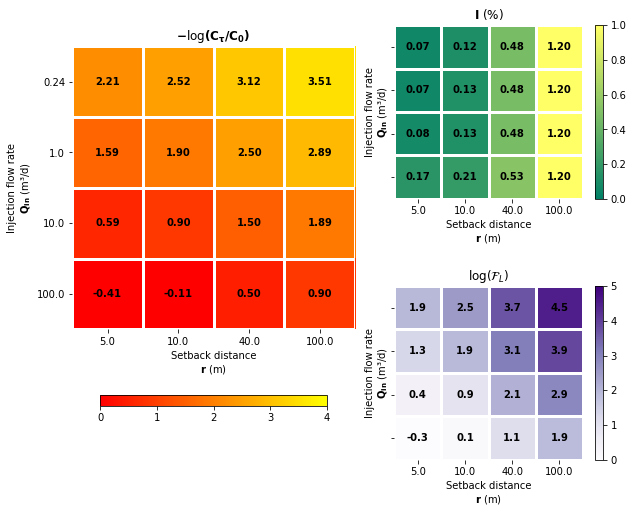

In [12]:
K = 10**-2
H = 20
f = 10
C0 = 1.0
decayRate = 3.5353E-06

Qin_array = np.array([0.24,1.0,10.0,100.])/86400.
rarray = np.array([5.,10.,40.,100.])
Iarray = 10**np.linspace(-5,0,num=100)

Ci = np.zeros([len(rarray),len(Qin_array)])
Ii = np.zeros([len(rarray),len(Qin_array)])
FLi = np.zeros([len(rarray),len(Qin_array)])

for qi,Qin in enumerate(Qin_array):
    for ri,r in enumerate(rarray):
        i = findSweet()

        worstC = -np.log10(cBoth()[i])
        worstGradient = Iarray[i]
        worstFlowNumber = flowNumber()[i]
        
        Ci[ri,qi] = worstC
        Ii[ri,qi] = worstGradient
        FLi[ri,qi] = worstFlowNumber

myLabels={"Title": { 0: r"$\bf{-\log (C_{\tau}/C_0)}$",
                     1: r"$\bf{I}$ (%)",
                     2: r"$\log(\mathcal{F}_L)$"},
          "Y": "Injection flow rate\n$\\bf{Q_{in}}$ (m³/d)",
          "X": "Setback distance\n$\\bf{r}$ (m)"}

threeHeatplots(data={"I":Ii.T,"C":Ci.T,"FL":FLi.T},\
               ylabel=rarray,xlabel=np.round(Qin_array*86400,decimals=2),myLabels=myLabels);

## PLOTRAN SIMULATION RESULTS

In [20]:
minI = np.array([0.00046667, 0.0013    , 0.0048    , 0.012     , 0.00046667,
       0.0013    , 0.0048    , 0.012     , 0.00053333, 0.0013    ,
       0.0048    , 0.012     , 0.00056667, 0.0021    , 0.0053    ,
       0.012     ])

minC = np.array([2.2514572 , 2.62298917, 3.14213329, 3.51421485, 1.64182175,
       2.00913676, 2.52461269, 2.89537637, 0.74130696, 1.0754177 ,
       1.55071976, 1.90646243, 0.18705258, 0.39222131, 0.73428991,
       1.00387133])

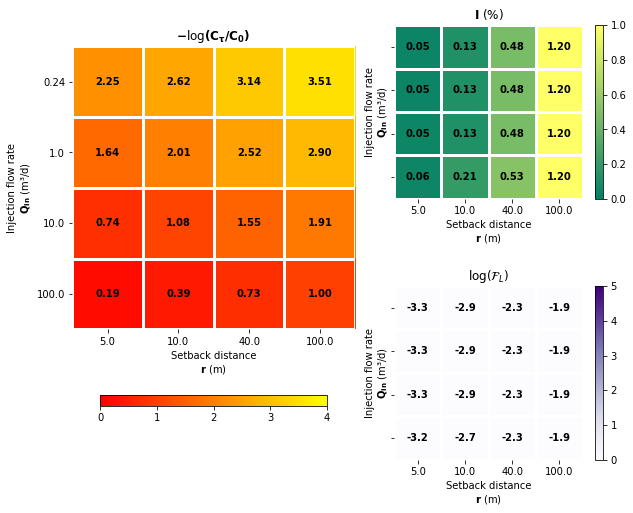

In [22]:
Qin_array = np.array([0.24,1.0,10.0,100.])/86400.
rarray = np.array([5.,10.,40.,100.])
Iarray = 10**np.linspace(-5,0,num=100)

Ci = np.zeros([len(rarray),len(Qin_array)])
Ii = np.zeros([len(rarray),len(Qin_array)])
FLi = np.zeros([len(rarray),len(Qin_array)])

i = 0
for qi,Qin in enumerate(Qin_array):
    for ri,r in enumerate(rarray):
        worstC = minC[i]
        worstGradient = minI[i]
        
        Ci[ri,qi] = worstC
        Ii[ri,qi] = worstGradient

        i += 1

myLabels={"Title": { 0: r"$\bf{-\log (C_{\tau}/C_0)}$",
                     1: r"$\bf{I}$ (%)",
                     2: r"$\log(\mathcal{F}_L)$"},
          "Y": "Injection flow rate\n$\\bf{Q_{in}}$ (m³/d)",
          "X": "Setback distance\n$\\bf{r}$ (m)"}

threeHeatplots(data={"I":Ii.T,"C":Ci.T,"FL":Ii.T},\
               ylabel=rarray,xlabel=np.round(Qin_array*86400,decimals=2),myLabels=myLabels);